<h1>Exploratory Data Analysis Mini Project </h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=[15,6]
pd.set_option("display.max_columns",None)

import warnings
warnings.filterwarnings("ignore")

#### DESCRIPTIVE STATISTICS

###### Q. Create a dataframe using below data and answer the below questions

Hourly_Income = [1000,2009,24418,444478,324235,243242,3434234,7567457,9235,238237,1312,3412]<br>
Hourly_Expense =  [651361,217371,2746,2356,13436,5732,346346,3463,1132,23534,242235,235235]<br>
Family_members_count = [3,4,2,3,1,4,5,6,3,6,3,5]<br>
House_rent = [1299,2300,3411,3422,4566,4211,4600,736,672,0,734,2374]<br>
Highest_income_Member = ["Olivia","George","Isla","Harry","Ava","Noah","Sophia","Jacobi","Freddie","Ella","Grace","Ella"]<br>

In [2]:
Hourly_Income = [1000,2009,24418,444478,324235,243242,3434234,7567457,9235,238237,1312,3412]
Hourly_Expense =  [651361,217371,2746,2356,13436,5732,346346,3463,1132,23534,242235,235235]
Family_members_count = [3,4,2,3,1,4,5,6,3,6,3,5]
House_rent = [1299,2300,3411,3422,4566,4211,4600,736,672,0,734,2374]
Highest_income_Member = ["Olivia","George","Isla","Harry","Ava","Noah","Sophia","Jacobi","Freddie","Ella","Grace","Ella"]

In [3]:
data=pd.DataFrame({
    "Hourly_income":Hourly_Income,
    "Hourly_Expense":Hourly_Expense,
    "Family_members_count":Family_members_count,
    "House_rent":House_rent,
    "Highest_income_Member":Highest_income_Member
})
data.head()

,Hourly_income,Hourly_Expense,Family_members_count,House_rent,Highest_income_Member
0,1000,651361,3,1299,Olivia
1,2009,217371,4,2300,George
2,24418,2746,2,3411,Isla
3,444478,2356,3,3422,Harry
4,324235,13436,1,4566,Ava


###### Q. Display the five point summary of the data

In [4]:
data.describe()

,Hourly_income,Hourly_Expense,Family_members_count,House_rent
count,1.200000e+01,12.000000,12.000000,12.000000
mean,1.024439e+06,145412.250000,3.750000,2360.416667
std,2.274083e+06,202831.565333,1.544786,1661.663813
min,1.000000e+03,1132.000000,1.000000,0.000000
25%,3.061250e+03,3283.750000,3.000000,735.500000
50%,1.313275e+05,18485.000000,3.500000,2337.000000
75%,3.542958e+05,236985.000000,5.000000,3619.250000
max,7.567457e+06,651361.000000,6.000000,4600.000000


<b>Take-away</b><br>
The five point summary of the data (Minimum value, 25th percentile, Median, 75th percentile, Maximum value) and other informations are given above

###### Q. What is the mean of the hourly expense?

In [5]:
data.Hourly_Expense.mean()

145412.25

###### Q. What is the median of the hourly expense?


In [6]:
data.Hourly_Expense.median()

18485.0

###### Q. Find the family member with maximum income and using a suitable graph.

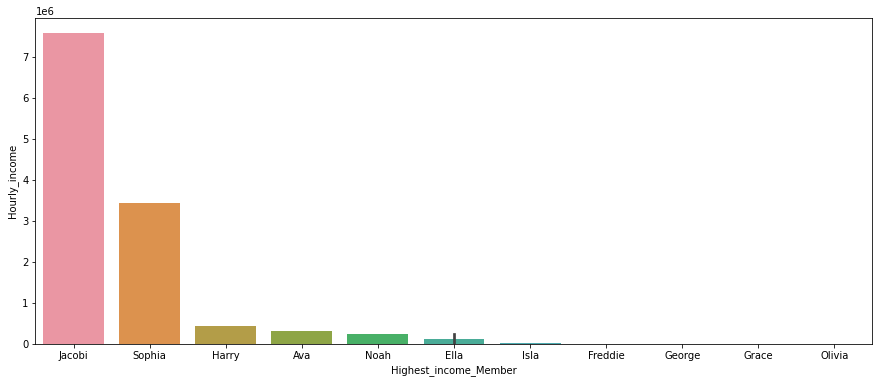

In [7]:
sns.barplot(data=data.sort_values("Hourly_income",ascending=False),x="Highest_income_Member",y="Hourly_income");

###### Q. Calculate IQR(the difference between 75% and 25% quartile) for `Hourly_Income` and `Hourly_Expense`.

In [8]:
hinc_q1=data.Hourly_income.quantile(0.75)
hinc_q3=data.Hourly_income.quantile(0.25)
hinc_iqr=hinc_q1-hinc_q3

hexp_q1=data.Hourly_Expense.quantile(0.75)
hexp_q3=data.Hourly_Expense.quantile(0.25)
hexp_iqr=hexp_q1-hexp_q3

In [9]:
print("IQR for Hourly Income: {:>9} \nIQR for Hourly Expense: {}".format(hinc_iqr,hexp_iqr))

IQR for Hourly Income:  351234.5 
IQR for Hourly Expense: 233701.25


###### Q. Calculate the standard deviation for first 2 columns.

In [10]:
data.std()[:2]

Hourly_income     2.274083e+06
Hourly_Expense    2.028316e+05
dtype: float64

###### Q. Calculate variance for the first 4 columns

In [11]:
data.var()

Hourly_income           5.171452e+12
Hourly_Expense          4.114064e+10
Family_members_count    2.386364e+00
House_rent              2.761127e+06
dtype: float64

#### Preliminary Wrangling

<b>Dataset Information</b><br>

Dataset recording people to invest in each other in a way that is financially and socially rewarding. On loans, borrowers list loan requests between $ 2,000 and $ 35,000 and individual investors invest as little as $ 25 in each loan listing they select. Prosper handles the servicing of the loan on behalf of the matched borrowers and investors.

###### Q. Read the dataset called Pri-Load.csv

In [12]:
data=pd.read_csv("Pri-Load.csv")
data.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,AmountDelinquent,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_InterestandFees,Investors
0,2007-08-26 19:09:29.263000000,36,Completed,14-08-2009 0.00,0.16516,0.1580,0.1380,NaN,NaN,0,CO,Other,Self-employed,472.0,3083.333333,0,9425,12-09-2007 0.00,Q3 2007,330.43,1971.14,258
1,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,0.0820,A,7.0,2,CO,Professional,Employed,0.0,6125.000000,0,10000,03-03-2014 0.00,Q1 2014,318.93,0.00,1
2,2007-01-05 15:00:47.090000000,36,Completed,17-12-2009 0.00,0.28269,0.2750,0.2400,NaN,NaN,0,GA,Other,Not available,NaN,2083.333333,0,3001,17-01-2007 0.00,Q1 2007,123.32,1185.63,41
3,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,0.0874,A,9.0,16,GA,Skilled Labor,Employed,10056.0,2875.000000,0,10000,01-11-2012 0.00,Q4 2012,321.45,1052.11,158
4,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,0.1985,D,4.0,2,MN,Executive,Employed,0.0,9583.333333,0,15000,20-09-2013 0.00,Q3 2013,563.97,1256.63,20


In [13]:
data.shape

(1035, 22)

###### Q. Check the data type and adjust datatype for all other categorical columns

In [14]:
data.dtypes

ListingCreationDate           object
Term                           int64
LoanStatus                    object
ClosedDate                    object
BorrowerAPR                  float64
BorrowerRate                 float64
LenderYield                  float64
ProsperRating (Alpha)         object
ProsperScore                 float64
ListingCategory (numeric)      int64
BorrowerState                 object
Occupation                    object
EmploymentStatus              object
AmountDelinquent             float64
StatedMonthlyIncome          float64
LoanCurrentDaysDelinquent      int64
LoanOriginalAmount             int64
LoanOriginationDate           object
LoanOriginationQuarter        object
MonthlyLoanPayment           float64
LP_InterestandFees           float64
Investors                      int64
dtype: object

###### Q. If you find any of the missing values in the ProsperRating column, then drop it

In [15]:
data.dropna(subset=["ProsperRating (Alpha)"],inplace=True)

In [16]:
data["ProsperRating (Alpha)"].isnull().sum()

0

#### Univariate Analysis

###### Q. What are the main features of interest in your dataset

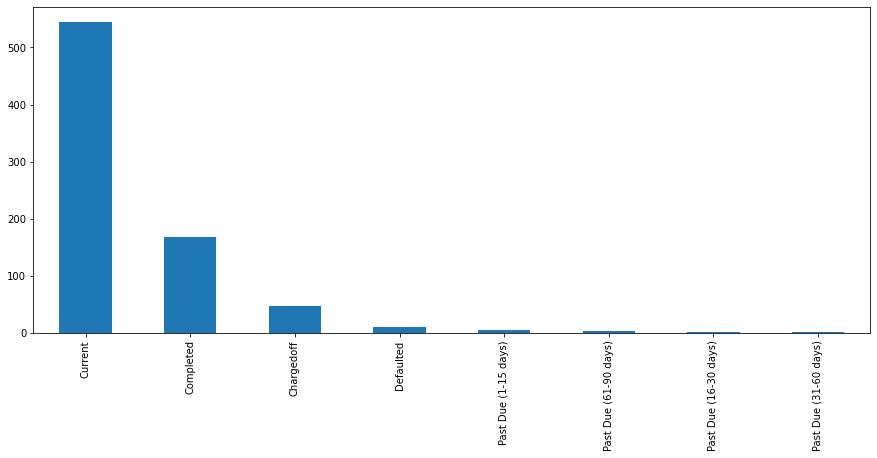

In [17]:
data.LoanStatus.value_counts().plot(kind="bar")
# sns.countplot(data=data,y="LoanStatus")
plt.show()

<b>Take-away</b><br>
Across the loan requests, the majority are still under the status 'Current', followed by the 'Completed' loan requests

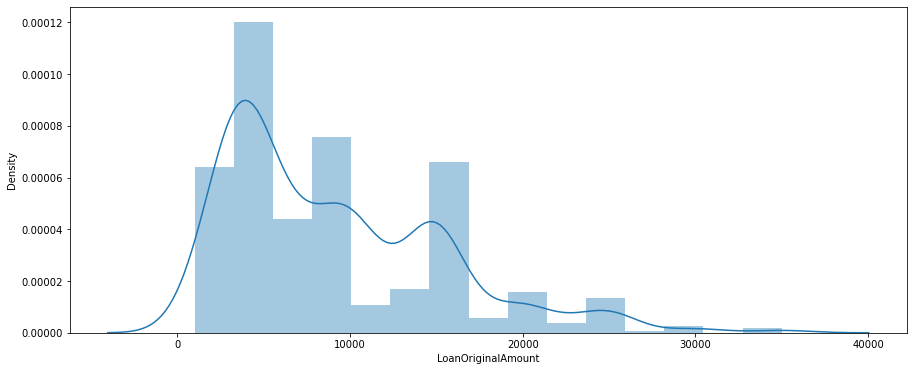

In [18]:
sns.distplot(data.LoanOriginalAmount);

<b>Take-away</b><br>
1. The Loan Amount is right skewed
2. The most frequest Loan Amount falls under 5,000/-

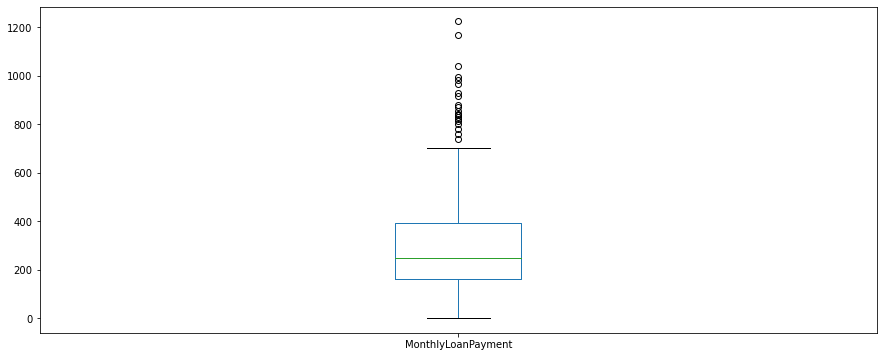

In [19]:
data.MonthlyLoanPayment.plot(kind="box");

<b>Take-away</b><br>
1. Similar to the Loan Amount, the feature Monthly Loan Payment is also noticebly right skewed
2. The 50% of the data falls roughly around 200/- denoting presence of heavy outliers

#### Bivariate Anlaysis

###### Q. Check the correlation matrix for all numeric variables. Maintain the Strong positive and Negative correlations columns

In [20]:
data.corr()

,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),AmountDelinquent,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,LP_InterestandFees,Investors
Term,1.000000,-0.114773,-0.051395,-0.051395,0.090518,-0.108346,-0.066580,0.075713,-0.090192,0.363728,0.075655,0.166858,-0.030132
BorrowerAPR,-0.114773,1.000000,0.993566,0.993566,-0.640320,0.158519,0.005908,-0.252639,0.227554,-0.422646,-0.312658,0.230707,-0.234232
BorrowerRate,-0.051395,0.993566,1.000000,1.000000,-0.619934,0.148140,-0.003389,-0.254265,0.238240,-0.412322,-0.322830,0.257639,-0.214173
LenderYield,-0.051395,0.993566,1.000000,1.000000,-0.619934,0.148140,-0.003389,-0.254265,0.238240,-0.412322,-0.322830,0.257639,-0.214173
ProsperScore,0.090518,-0.640320,-0.619934,-0.619934,1.000000,-0.041906,-0.062707,0.199536,-0.072170,0.245904,0.144268,0.016248,0.311131
ListingCategory (numeric),-0.108346,0.158519,0.148140,0.148140,-0.041906,1.000000,0.076968,-0.082321,0.010424,-0.229170,-0.206464,0.031386,-0.033180
AmountDelinquent,-0.066580,0.005908,-0.003389,-0.003389,-0.062707,0.076968,1.000000,-0.017033,-0.005276,-0.071448,-0.062087,-0.056868,-0.045042
StatedMonthlyIncome,0.075713,-0.252639,-0.254265,-0.254265,0.199536,-0.082321,-0.017033,1.000000,-0.098607,0.418816,0.396892,0.108826,0.088789
LoanCurrentDaysDelinquent,-0.090192,0.227554,0.238240,0.238240,-0.072170,0.010424,-0.005276,-0.098607,1.000000,-0.136783,-0.101961,-0.029949,0.041179
LoanOriginalAmount,0.363728,-0.422646,-0.412322,-0.412322,0.245904,-0.229170,-0.071448,0.418816,-0.136783,1.000000,0.924229,0.269348,0.298321


<AxesSubplot:>

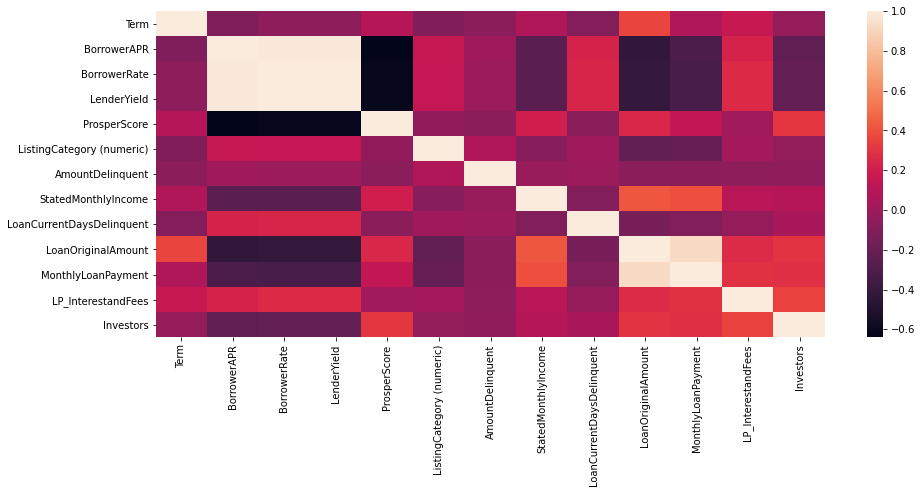

In [21]:
sns.heatmap(data.corr())

<b>Take-away</b><br>
1. There is strong positive correlation between the features 'BorrowerAPR', 'BorrowerRate' and 'LenderYield'
2. A strong negative correlation can be observed for 'ProsperScore' with 'BorrowerAPR', 'BorrowerRate' & 'LenderYield'

###### Q. Check the relation between `LoanOriginalAmount` and `BorrowerAPR` columns

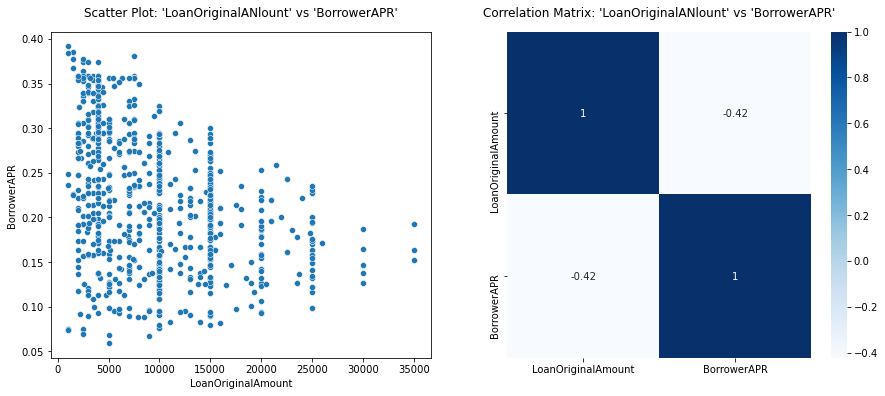

In [22]:
plt.subplot(1,2,1)
plt.title("Scatter Plot: 'LoanOriginalANlount' vs 'BorrowerAPR'",pad=15)
sns.scatterplot(data.LoanOriginalAmount,data.BorrowerAPR)

plt.subplot(1,2,2)
plt.title("Correlation Matrix: 'LoanOriginalANlount' vs 'BorrowerAPR'",pad=15)
sns.heatmap(data[['LoanOriginalAmount','BorrowerAPR']].corr(),annot=True,cmap='Blues')

plt.show()

<b>Take-away</b><br>
1. A negative correlation can be observed between the said features
2. From the scatter plot it is noticable that, as the LoanOriginalAmount increases the 'BorrowerAOR' decreases
3. However, the observed correlation isn't a strong one

###### Q. Display the seperate box plot for `y = BorrowerAPR`  with x1 = `LoanStatus`, x2 = `EmploymentStatus` columns.Write your observations

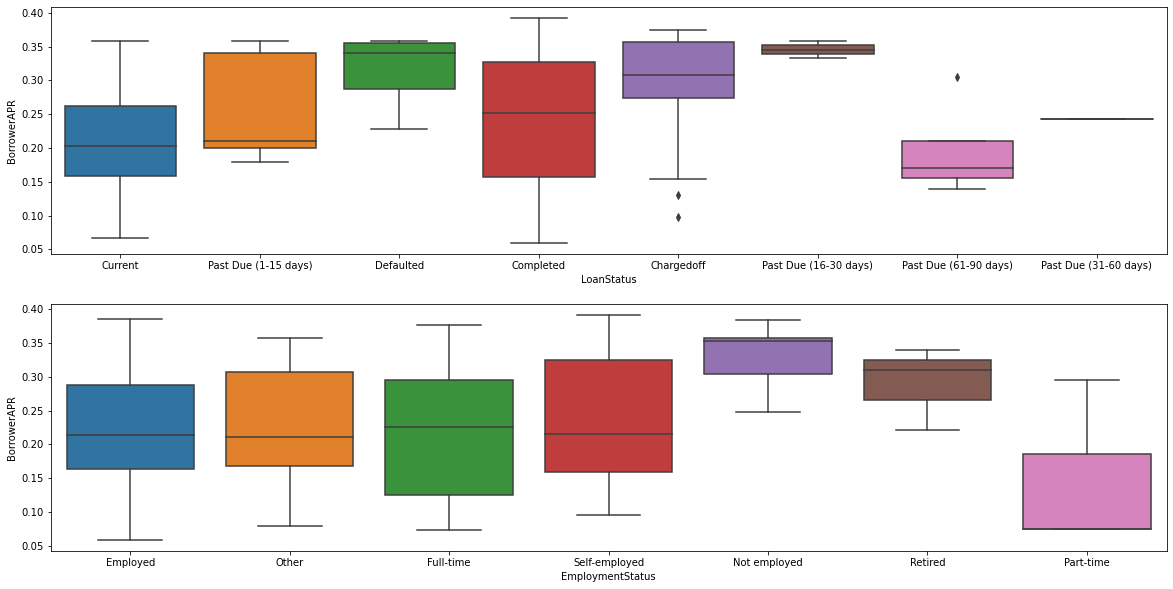

In [23]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
sns.boxplot(data.LoanStatus,data.BorrowerAPR)

plt.subplot(2,1,2)
sns.boxplot(data.EmploymentStatus,data.BorrowerAPR)

plt.show()

<b>Take-away</b><br>
1. For BorrowerAPR vs LoanStatus, the class 'Completed' has got the highest and the lowest value
2. For BorrowerAPR vs EmploymentStatus, the class 'Self-EMployed' has got the highest value and the class 'Employed' has the lowest BorrowerAPR value

#### Multi Variate Analysis & Feature Engineering

###### Q. Write a program

Step 1: Create a  condition on 'LoanStatus' to reduce the class labels to binary classification

Step 2: Create a user define function  using condition and `LoanStatus` column

Step 3: Print unique class label counts

In [24]:
data.LoanStatus.value_counts()

Current                  544
Completed                168
Chargedoff                48
Defaulted                 11
Past Due (1-15 days)       5
Past Due (61-90 days)      4
Past Due (16-30 days)      2
Past Due (31-60 days)      1
Name: LoanStatus, dtype: int64

Note: Inorder to convert the multi class labels to binary, categories 'Current' and 'Completed' are grouped together as 'Class C' and the rest as 'Class D'

In [25]:
def conv_loanstatus(val):
    if val=='Current' or val=='Completed':
        return 'Class C'
    else:
        return 'Class D'
    
data["LoanStatus_Binary"]=data["LoanStatus"].apply(conv_loanstatus)

In [26]:
data.LoanStatus_Binary.value_counts()

Class C    712
Class D     71
Name: LoanStatus_Binary, dtype: int64

###### Q. Write a program
Create a user define function to give `ListingCategory (numeric)` column meaningful class labels. Categories can be found below: 

1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'

In [27]:
data["ListingCategory (numeric)"].value_counts()

1     483
7      80
2      68
3      41
6      22
13     21
15     17
18     16
14      9
19      8
20      6
11      4
16      3
8       2
9       2
17      1
Name: ListingCategory (numeric), dtype: int64

In [28]:
categories={1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}

data["ListingCategory"]=data["ListingCategory (numeric)"].map(categories)

In [29]:
data["ListingCategory"].value_counts()

Debt Consolidation    483
Other                  80
Home Improvement       68
Business               41
Auto                   22
Name: ListingCategory, dtype: int64

In [30]:
# However there are null values
data.ListingCategory.isnull().sum()

89

###### Q. Display the box plot for `ProsperRating (Alpha)` vs `LoanOriginalAmount` and hue = `Loan Status`. Write your observations

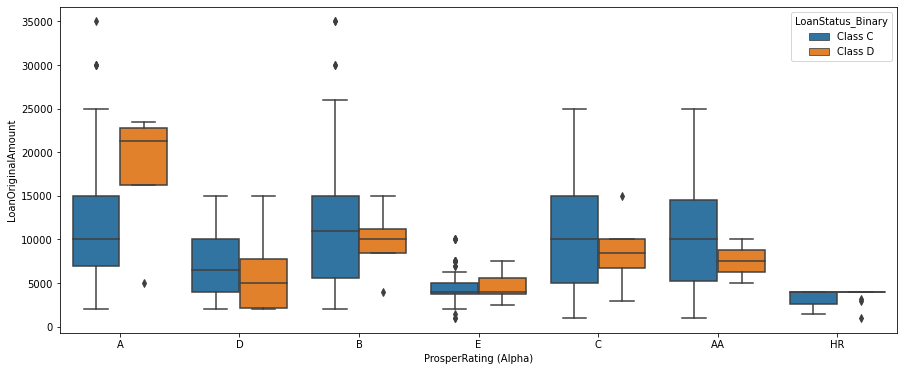

In [31]:
sns.boxplot(data=data,x="ProsperRating (Alpha)",y="LoanOriginalAmount",hue="LoanStatus_Binary");

<b>Take-away</b><br>
1. Outliers are present in almost all ProsperRating categories for both categories of LoanStatus
2. An almost similar median is observed for the category 'E' of ProsperRating
3. The higher values observed belong to the 'Class C' of LoanStatus

###### Q. Display the catplot for `ProsperRating (Alpha)` vs `ListingCategory`and hue = `Loan Status`. Write your observations.

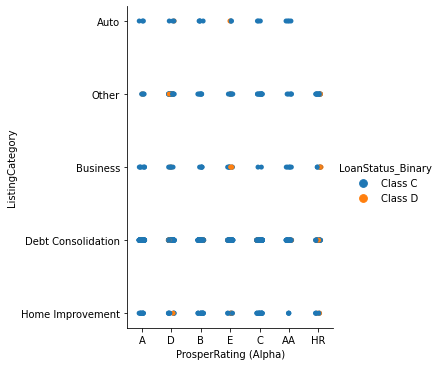

In [32]:
sns.catplot(data=data[~(data["ListingCategory"].isnull())],x="ProsperRating (Alpha)",y="ListingCategory",hue="LoanStatus_Binary");

<b>Take-away</b><br>
1. Most of the values in prosperrating categories and listing category have loanstatus value as completed
2. There are only a very few instance under the LoanStatus category 'Class D' in the Listing category 'Debt Consolidation'